#### SENTIMENT ANALYSIS

In [53]:
#importing neccessary libraries

import csv
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time
time.sleep(2)
import warnings
warnings.filterwarnings('ignore')

In [54]:
#movie review urls

urls = []

url1 = 'https://www.imdb.com/title/tt0157262/reviews/?ref_=tt_ql_2'

url2 = 'https://www.imdb.com/title/tt1530509/reviews/?ref_=tt_ql_2'

url3 = 'https://www.imdb.com/title/tt1160419/reviews/?ref_=tt_ql_2'

url4 = 'https://www.imdb.com/title/tt3973410/reviews/?ref_=tt_ql_2'

url5 = 'https://www.imdb.com/title/tt0133093/reviews/?ref_=tt_ql_2'

url6 = 'https://www.imdb.com/title/tt16280138/reviews/?ref_=tt_ql_2'

url7 = 'https://www.imdb.com/title/tt0105575/reviews/?ref_=tt_ql_2'



In [55]:
#appending url for each assigned movie review to urls list

urls.append(url1)
urls.append(url2)
urls.append(url3)
urls.append(url4)
urls.append(url5)
urls.append(url6)
urls.append(url7)

In [56]:
content = []
for url in urls:
    page = requests.get(url, timeout=2.50)
    page_content = page.content
    soup = BeautifulSoup(page_content, 'html.parser')
    content.append(soup.find_all('div', class_= 'review-container'))

EAch URL webpage is inspected to view the elements. Upon hovering the cursor over HTML elements, the div tag below contains an example of HTML for the reviews and ratings which are of interest:

< div class="review-container" style="max-height: 300px;">  
    
 The review title is also of interest to us and below is an example of the HTML anchor tag for a review title of one of my movies:
    
 < a href="/review/rw1394473/?ref_=tt_urv" class="title"> The Mother of all caste-based movies
< /a> 
    
The commented piece of code in the next cell prints what the content of the < div> contains. It is commented out for readability purposes.
    
    

In [108]:
#print(content)

In [58]:
#defining dataframe called 'movie' to store movie reviews and the user ratings

movie = pd.DataFrame(columns=['Review','Rating'])

In [59]:
movie.head()

,Review,Rating


In [110]:
#defining dataframe to store 'Review' and 'Rating'. If rating is not given for a review,
#we ignore that review.
review = []

rating = []
count = 0
for cc in content:
    for c in cc:    
        count+= 1   
    
        print('\nMovie review ', count)
        #Get review.
        str = c.find_all('a', attrs={'class':'title'})      
        rReview =''
        for s in str:
            #print('Review is: ',s.get_text())
            rReview = s.get_text()
      
        #Get rating.
        ratings = c.find_all('span', attrs={'class':''})
        rVal = []
        for r in ratings:
            str1 = r.get_text().strip()
            rVal.append(str1)
    
        val = rVal[0]
        if(len(val) > 2):
            continue     
        else:
            review.append(rReview)
            rating.append(val)
            print('Review: ', rReview)
            print('Rating: ',val) 
        
movie['Review'] = review
movie['Rating'] = rating


Movie review  1

Movie review  2
Review:   Completely terrible. I feel sorry for Leslie Nielsen.

Rating:  2

Movie review  3
Review:   Whatever Happened To Leslie Nielson?

Rating:  1

Movie review  4
Review:   The irony in the word "travesty" is correct...

Rating:  2

Movie review  5
Review:   There are no heroes

Rating:  2

Movie review  6

Movie review  7
Review:   Things are just getting worse and worse...

Rating:  2

Movie review  8
Review:   Glad to know that I just didn't understand the film

Rating:  3

Movie review  9

Movie review  10
Review:   Tedious and unfunny.

Rating:  1

Movie review  11
Review:   Atrocious and sad, but certainly not funny

Rating:  1

Movie review  12
Review:   An unfortunate display of bad comedy writing

Rating:  4

Movie review  13

Movie review  14
Review:   Leslie Nielsen in outer space

Rating:  8

Movie review  15
Review:   "How did this get 3?"

Rating:  1

Movie review  16

Movie review  17
Review:   I am left speechless to describe how 

ValueError: Length of values (155) does not match length of index (153)

In [61]:
#displaying first 5 rows of 'movie' dataframe 

movie.head(5)

,Review,Rating
0,Completely terrible. I feel sorry for Leslie ...,2
1,Whatever Happened To Leslie Nielson?\n,1
2,"The irony in the word ""travesty"" is correct...\n",2
3,There are no heroes\n,2
4,Things are just getting worse and worse...\n,2


In [62]:
#displaying dimension of dataframe

movie.shape

(155, 2)

We have 155 rows of data, representing 155 reviews and ratings, to perform sentiment analysis

In [63]:
#saving dataframe to csv file

movie.to_csv('AyokunleOlagunju-2217353.csv', index=False)

-------------------------------------------------------------------------------------------

#### TEXT PROCESSING AND ANALYSIS

In [64]:
#importing necessary libraries

import string
import re
import nltk
#nltk.download()
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

In [65]:
#defining dataframe 'textFeatures' for movie review texts and displaying dataframe dimensions

textFeatures = movie['Review'].copy()
textFeatures.shape

(155,)

In [66]:
#Preparing text for Wordcloud
text = []
for t in textFeatures:
  text.append(t)
all_text = ', '.join(t for t in text)
#print(all_text)
print(len(all_text))

6648


In [67]:
#importing neccessary libraries
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

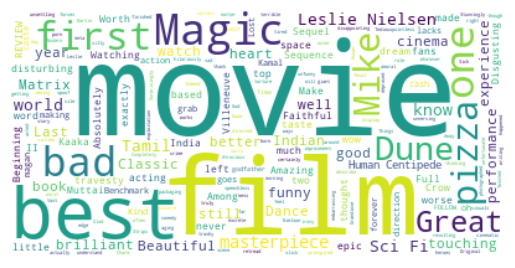

In [68]:
# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["br", "im", "thats"]) #"im","lol","Xa","film"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_text)
# Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#save the generated image to a file
wordcloud.to_file("wordcloud_cb_all.png")

-------------------------------------------------------------------------------------------

#### SENTIMENT IDENTIFICATION USING VADER

In [69]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ayokunlejames/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [70]:
sid = SentimentIntensityAnalyzer()
c = 0
for t in text:
    c+=1
    print(c, t)
    ss = sid.polarity_scores(t)
    print(ss)
    
    if(ss['compound'] >= 0.05):
        print('positive')
 
    elif(ss['compound'] <= -0.05):
        print('negative')
    else:
        print('neutral')
    print('\n')

1  Completely terrible. I feel sorry for Leslie Nielsen.

{'neg': 0.498, 'neu': 0.502, 'pos': 0.0, 'compound': -0.6068}
negative


2  Whatever Happened To Leslie Nielson?

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
neutral


3  The irony in the word "travesty" is correct...

{'neg': 0.146, 'neu': 0.854, 'pos': 0.0, 'compound': -0.0516}
negative


4  There are no heroes

{'neg': 0.293, 'neu': 0.267, 'pos': 0.44, 'compound': 0.2732}
positive


5  Things are just getting worse and worse...

{'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'compound': -0.4767}
negative


6  Glad to know that I just didn't understand the film

{'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'compound': 0.4588}
positive


7  Tedious and unfunny.

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
neutral


8  Atrocious and sad, but certainly not funny

{'neg': 0.421, 'neu': 0.326, 'pos': 0.253, 'compound': -0.2638}
negative


9  An unfortunate display of bad comedy writing

{'neg': 0.5, 'neu': 0.308, 'pos': 0

-------------------------------------------------------------------------------------------

#### SENTIMENT CLASSIFICATION USING MACHINE LEARNING

 #### Preparing Truth Set 

 'User Rating' will be used as a truth set to evaluate the results. To prepare 'Truth Set', three classes are defined as - 'positive', 'negative', and 'netural'. On the scale of 0 to 10, consider review being:
 * 'positvie' if the rating is from 6 to 10, 
 * 'negative' if the rating is from 0 to 4, 
 * 'netural' if rating is 5. 
 


In [71]:
#the above information is added in a new column called 'class-label'.
label = []
for r in movie['Rating']:
    r = int(r)
    if (r>5):
        label.append('1') #Positive
    elif(r<5):
        label.append('-1') #Negative
    elif(r==5):
        label.append('0') #Netural
movie['class-label'] = label

In [72]:
#displaying top 5 rows of movie dataframe

movie.head()

,Review,Rating,class-label
0,Completely terrible. I feel sorry for Leslie ...,2,-1
1,Whatever Happened To Leslie Nielson?\n,1,-1
2,"The irony in the word ""travesty"" is correct...\n",2,-1
3,There are no heroes\n,2,-1
4,Things are just getting worse and worse...\n,2,-1


In [73]:
#displaying count of each value of 'class-label'

movie['class-label'].value_counts()

1     102
-1     51
0       2
Name: class-label, dtype: int64

As can be observed, there is an imbalance in the dataset. We can attempt to fix this by removing the neutral class and making our dataset a binary classification set with positive(1) and negative(-1) classes only.

In [74]:
#code below ignores the neutral class, where class-label = 0

movie = movie[movie['class-label']!='0']

In [75]:
#displaying count of unique values of class-label

movie['class-label'].value_counts()

1     102
-1     51
Name: class-label, dtype: int64

In [76]:
#defining dataframe 'textFeatures' for movie review texts and displaying dataframe dimensions


textFeatures = movie['Review'].copy()
textFeatures.shape

(153,)

In [77]:
#importing necessary libraries

import nltk
nltk.download('punkt')
# Stemming using TextBlob library for stemming
from textblob import TextBlob 

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ayokunlejames/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [78]:
#defining textblob tokenizer

def textblob_tokenizer(input_str):
    blob = TextBlob(input_str.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

In [79]:
#Toy example: 
print(textblob_tokenizer('Q: studed studing!!! I miss uuuu! It&#039;s'))

['q', 'stude', 'stude', 'i', 'miss', 'uuuu', 'it', '039', 's']


The above Toy example demonstrates that TextBlob() function has converted given sentence into tokens or words, converted upper case letters to lower case, and removed wild characters.


-------------------------------------------------------------------------------------------

#### TRY FOR FUN

Try to identify which characters have been removed. Also, try to identify what is the lenght of the output.

Answer: 

Characters which have been removed from text include: ':', '!', '!', '!', '!', '&', '#', ';'. Also removed are 'd' in 'studed' and 'i', 'n', 'g' in 'studing'.

In [80]:
#retrieving length of textblob tokenizer toy example output, by storing to a list
#and printing length using len() function

print("Length of the output is: {}".format(len(list(textblob_tokenizer('Q: studed studing!!! I miss uuuu! It&#039;s')))))

Length of the output is: 9


-------------------------------------------------------------------------------------------

#### TRANSFORMING TEXT DATASET INTO TWO MATRIX REPRESENTATIONS 

In [81]:
#countvectorizer converts each review into a vector based on the word count.
countvectorizer = CountVectorizer(analyzer= 'word', stop_words= 'english', 
                                  tokenizer=textblob_tokenizer) 
#converts text into a vector based on tf-idf weighting scheme. 
tfidfvectorizer = TfidfVectorizer(analyzer= 'word', stop_words= 'english', 
                                  tokenizer=textblob_tokenizer) 

In [82]:
textFeatures

0       Completely terrible. I feel sorry for Leslie ...
1                 Whatever Happened To Leslie Nielson?\n
2       The irony in the word "travesty" is correct...\n
3                                  There are no heroes\n
4           Things are just getting worse and worse...\n
                             ...                        
150     This film i consider is the first of its kind...
151                                     A Masterpiece!\n
152                                       What a movie\n
153     THEVARMAGAN MOVIE NOT FOLLOW GODFATHER ,KAMAL...
154                                    Legendary movie\n
Name: Review, Length: 153, dtype: object

In [83]:
count_matrix = countvectorizer.fit_transform(textFeatures) 
tfidf_matrix = tfidfvectorizer.fit_transform(textFeatures)

In [84]:
#Printing the dimensions of the tfidf_matrix, x rows (number of reviews) and y columns (total 
 # words occur in the entire dataset.)
    
print(tfidf_matrix.shape) 
print(count_matrix.shape)

(153, 394)
(153, 394)


Above numbers show dimension of count_matrix, there are X rows (153 reviews), and Y columns (394 word-features) in the transformed dataset. 

-------------------------------------------------------------------------------------------

#### Try-For-Fun:

Experiment without adopting pre-processing.

In [104]:
#converting each review into a vector where preprocessor = None and tokenizer = None
count_vectorizer2 = CountVectorizer(preprocessor=None, tokenizer=None)
tfidf_vectorizer2 = TfidfVectorizer(preprocessor=None, tokenizer=None)

In [86]:
count_matrix2 = count_vectorizer2.fit_transform(textFeatures)
tfidf_matrix2 = tfidf_vectorizer2.fit_transform(textFeatures)


In [87]:
#Printing the dimensions of the tfidf_matrix and count_matrix

print(tfidf_matrix.shape)
print(count_matrix.shape)

(153, 394)
(153, 394)


------------------------------------------------------------------------------------------

#### BUILDING ML MODEL

In [88]:
features_train, features_test, labels_train, labels_test = train_test_split(
    tfidf_matrix, movie['class-label'], test_size=0.3,random_state=53)
print(features_train.shape, features_test.shape, labels_train.shape, labels_test.shape)

(107, 394) (46, 394) (107,) (46,)


In [89]:
#importing necessary libraries

from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score

In [106]:
#SVM classifier
from sklearn.svm import SVC
print("\nEvaluation for SVM \n")
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(features_train, labels_train)
prediction = svc.predict(features_test)
acc = accuracy_score(labels_test,prediction)
print('Accuracy:', acc)
from sklearn.metrics import precision_score
prec = precision_score(labels_test,prediction, average='weighted')
print('Precision:', prec)
from sklearn.metrics import recall_score
recall = recall_score(labels_test,prediction, average='weighted')
print('Recall:', recall)
from sklearn.metrics import f1_score
f1 = f1_score(labels_test,prediction, average='weighted')
print('F-1 measure: ', f1)
print('\nConfusion Matrix:\n')
print(confusion_matrix(labels_test, prediction))  
print(classification_report(labels_test, prediction))
print(prediction)


Evaluation for SVM 

Accuracy: 0.8478260869565217
Precision: 0.8533751142446794
Recall: 0.8478260869565217
F-1 measure:  0.8367989918084436

Confusion Matrix:

[[ 8  6]
 [ 1 31]]
              precision    recall  f1-score   support

          -1       0.89      0.57      0.70        14
           1       0.84      0.97      0.90        32

    accuracy                           0.85        46
   macro avg       0.86      0.77      0.80        46
weighted avg       0.85      0.85      0.84        46

['1' '-1' '1' '1' '-1' '1' '1' '1' '1' '-1' '1' '1' '1' '1' '1' '1' '-1'
 '1' '1' '1' '1' '1' '-1' '1' '1' '1' '1' '-1' '1' '1' '1' '1' '1' '-1'
 '1' '1' '-1' '1' '1' '1' '1' '1' '-1' '1' '1' '1']


In [91]:
#Decision Tree
print("\nEvaluation for Decision Tree \n")
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(features_train, labels_train)
prediction = dtree.predict(features_test)
acc = accuracy_score(labels_test,prediction)
print('Accuracy: ', acc)
prec = precision_score(labels_test,prediction, average='weighted')
print('Precision: ', prec)
recall = recall_score(labels_test,prediction, average='weighted')
print('Recall: ', recall)
f1 = f1_score(labels_test,prediction, average='weighted')
print('F-1 measure: ',f1)
print('\nConfusion Matrix:\n')
print(confusion_matrix(labels_test, prediction))  
print(classification_report(labels_test, prediction))


Evaluation for Decision Tree 

Accuracy:  0.8478260869565217
Precision:  0.8452851496329757
Recall:  0.8478260869565217
F-1 measure:  0.8421025308241401

Confusion Matrix:

[[ 9  5]
 [ 2 30]]
              precision    recall  f1-score   support

          -1       0.82      0.64      0.72        14
           1       0.86      0.94      0.90        32

    accuracy                           0.85        46
   macro avg       0.84      0.79      0.81        46
weighted avg       0.85      0.85      0.84        46



-------------------------------------------------------------------------------------------

#### Try-It-Yourself:

* Produce wordclouds of 'positive' and 'negative' reviews independently and reflect on the two wordclouds.

In [92]:
movie

,Review,Rating,class-label
0,Completely terrible. I feel sorry for Leslie ...,2,-1
1,Whatever Happened To Leslie Nielson?\n,1,-1
2,"The irony in the word ""travesty"" is correct...\n",2,-1
3,There are no heroes\n,2,-1
4,Things are just getting worse and worse...\n,2,-1
...,...,...,...
150,This film i consider is the first of its kind...,4,-1
151,A Masterpiece!\n,10,1
152,What a movie\n,9,1
153,"THEVARMAGAN MOVIE NOT FOLLOW GODFATHER ,KAMAL...",10,1


In [93]:
#filtering movie dataset to display only movies with positive reviews

positive_movie = movie[movie['class-label'] == '1']
positive_movie.head()

,Review,Rating,class-label
9,Leslie Nielsen in outer space\n,8,1
20,The Human Centipede II (Full Sequence)\n,6,1
21,Martin has a dream ... that one day ... the w...,6,1
25,Disgusting and amoral.\n,8,1
28,Vast improvement over the first film is down ...,7,1


In [94]:
#generating positive review text

positiveReviews = positive_movie['Review'].copy()

In [95]:
#Preparing text from positiveReviews for Wordcloud
text1 = []
for t in positiveReviews:
  text1.append(t)
all_text1 = ', '.join(t for t in text1)
#print(all_text)
print(len(all_text1))

4464


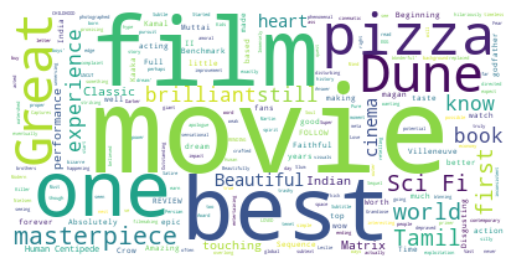

In [96]:
# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["br", "im", "thats"]) #"im","lol","Xa","film"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_text1)
# Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#save the generated image to a file
wordcloud.to_file("wordcloud_positive.png")

In [97]:
#filtering movie dataset to display only movies with negative reviews

negative_movie = movie[movie['class-label'] == '-1']
negative_movie.head()

,Review,Rating,class-label
0,Completely terrible. I feel sorry for Leslie ...,2,-1
1,Whatever Happened To Leslie Nielson?\n,1,-1
2,"The irony in the word ""travesty"" is correct...\n",2,-1
3,There are no heroes\n,2,-1
4,Things are just getting worse and worse...\n,2,-1


In [98]:
#generating negative review text

negativeReviews = negative_movie['Review'].copy()

In [99]:
#Preparing text from negativeReviews for Wordcloud
text2 = []
for t in negativeReviews:
  text2.append(t)
all_text2 = ', '.join(t for t in text2)
#print(all_text)
print(len(all_text2))

2120


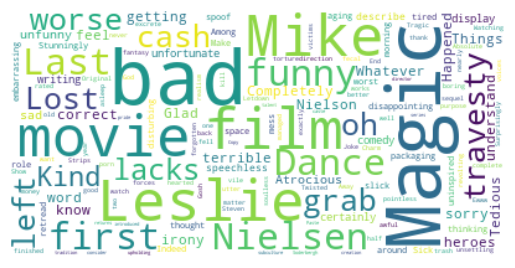

In [100]:
# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["br", "im", "thats"]) #"im","lol","Xa","film"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_text2)
# Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#save the generated image to a file
wordcloud.to_file("wordcloud_negative.png")

-------------------------------------------------------------------------------------------

#### Try it yourself

* In the above models, we used tf-idf scheme, use BoW scheme (count_matrix) in the similar way to build the two new models. Include these in your evaluation.


In [101]:
features_train1, features_test1, labels_train1, labels_test1 = train_test_split(
    count_matrix, movie['class-label'], test_size=0.3,random_state=53)
print(features_train1.shape, features_test1.shape, labels_train1.shape, labels_test1.shape)

(107, 394) (46, 394) (107,) (46,)


In [107]:
#SVM classifier
from sklearn.svm import SVC
print("\nEvaluation for SVM \n")
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(features_train1, labels_train1)
prediction = svc.predict(features_test1)
acc = accuracy_score(labels_test1,prediction)
print('Accuracy:', acc)
from sklearn.metrics import precision_score
prec = precision_score(labels_test1,prediction, average='weighted')
print('Precision:', prec)
from sklearn.metrics import recall_score
recall = recall_score(labels_test1,prediction, average='weighted')
print('Recall:', recall)
from sklearn.metrics import f1_score
f1 = f1_score(labels_test1,prediction, average='weighted')
print('F-1 measure: ', f1)
print('\nConfusion Matrix:\n')
print(confusion_matrix(labels_test1, prediction))  
print(classification_report(labels_test1, prediction))
print(prediction)


Evaluation for SVM 

Accuracy: 0.8478260869565217
Precision: 0.8452851496329757
Recall: 0.8478260869565217
F-1 measure:  0.8421025308241401

Confusion Matrix:

[[ 9  5]
 [ 2 30]]
              precision    recall  f1-score   support

          -1       0.82      0.64      0.72        14
           1       0.86      0.94      0.90        32

    accuracy                           0.85        46
   macro avg       0.84      0.79      0.81        46
weighted avg       0.85      0.85      0.84        46

['1' '-1' '1' '1' '-1' '-1' '1' '1' '-1' '-1' '1' '1' '1' '1' '1' '-1'
 '-1' '1' '1' '1' '1' '1' '-1' '1' '1' '1' '1' '-1' '1' '1' '1' '1' '1'
 '-1' '1' '1' '-1' '1' '1' '1' '1' '1' '1' '1' '1' '1']


In [103]:
#Decision Tree
print("\nEvaluation for Decision Tree \n")
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(features_train1, labels_train1)
prediction = dtree.predict(features_test1)
acc = accuracy_score(labels_test1,prediction)
print('Accuracy: ', acc)
prec = precision_score(labels_test1,prediction, average='weighted')
print('Precision: ', prec)
recall = recall_score(labels_test1,prediction, average='weighted')
print('Recall: ', recall)
f1 = f1_score(labels_test1,prediction, average='weighted')
print('F-1 measure: ',f1)
print('\nConfusion Matrix:\n')
print(confusion_matrix(labels_test1, prediction))  
print(classification_report(labels_test1, prediction))


Evaluation for Decision Tree 

Accuracy:  0.8695652173913043
Precision:  0.8674339300937767
Recall:  0.8695652173913043
F-1 measure:  0.8665247795682578

Confusion Matrix:

[[10  4]
 [ 2 30]]
              precision    recall  f1-score   support

          -1       0.83      0.71      0.77        14
           1       0.88      0.94      0.91        32

    accuracy                           0.87        46
   macro avg       0.86      0.83      0.84        46
weighted avg       0.87      0.87      0.87        46



#### Report 

* Write a summary on the evaluation performed and the interpretation of the results.

In this workshop, I performed sentiment analysis on text of movie user reviews scrapped from iMdB wesbsite. This analysis is to determine whether a sentiment is positive, negative, or neutral. This sentiment analysis is performed using VADER Valence Aware Dictionary and
sEntiment Reasoner). The result of this analysis is examined against the user ratings for each text. To analyze sentiment using VADER, the text is first preprocessed by tokenizing it into words and removing stop words and punctuations. Then, each word is assigned a sentiment score based on the lexicon, and the scores are aggregated to calculate the overall sentiment of the text. VADER also considers the context of the text, such as the presence of emoticons, capitalization, and punctuation, which can affect the sentiment of the text.

Upon completion of the sentiment analysis, and observing the result, it can be observed that VADER correctly classified some text and incorrectly cl;assified others.

* ##### Correct classification

Review: “Completely terrible. I feel sorry for Leslie Nielsen.”

Rating: 2

VADER sentiment: Negative

In this case, VADER has correctly classified the sentiment expressed in the above review text. This must be due to the use of Negative words, like ‘terrible’, ‘sorry’ and the use of words used express the degree of one’s sentiment like “Completely”. 

Review: "Absolutely Amazing Sequel"

Rating: 7

VADER classification: Positive

VADER correctly classifies this sentiment as positive due to the use of positive words and literal expression of sentiment rather than figurative. This helps VADER accurately classify this sentiment as positive.

* ##### Incorrect classification

Review: “Whatever Happened To Leslie Nielson?” 

Rating: 1 

VADER classification: Neutral

This review is classified as a neutral sentiment but it had a rating of 1, which indicates a negative sentiment towards the movie. The reason for the incorrect classification cannot be totally blamed on VADER because the user expressed their negative sentiment using neutral words which makes it difficult for VADER to pick up on the negativity of the sentiment. This seems to be a limitation of VADER.

Review: “Glad to know that I just didn't understand the film”

Rating: 3

VADER classification: Positive 

 This text has also incorrectly classified this text as a positive sentiment, when it is infact negative. This is because the negative sentiment is expressed figuratively, using subtle positive words like “Glad” which even begins the text. 

A major limitation I have observed with VADER is its limited understanding of context. VADER's understanding of context is limited to the presence of certain features, such as emoticons, punctuation, and capitalization. However, it may not be able to capture the broader context of the text, such as the tone, intent, or sarcasm. This might cause VADER to not perform very well with figurative language, as it would most likely misinterpret the sentiment. Additionally, because VADER uses a sentiment lexicon that is based on pre-defined lists of words and their corresponding sentiment scores, it may not be able to capture the nuances of sentiments that are not included in the lexicon. 

Overall, while VADER is a useful tool for sentiment analysis, it is important to be aware of its limitations and to evaluate its performance on the specific type of text before using it for sentiment analysis.

-------------------------------------------------------------------------------------------------------------

Further Machine learning classification technique was implemented on the dataset. ML models were built using two matrix representations of the same dataset (tf-idf scheme,  BoW scheme (count_matrix)). Two ML models (Support Vector Machine SVM and Decision tree classifier) were built for each scheme and the results of the classification would be discussed in this section.

First, I would examine the results of the SVM classification on both tf-idf and count_matrix.

#### Evaluation for SVM 

#### tf-idf


- Accuracy: 0.8478260869565217

- Precision: 0.8533751142446794

- Recall: 0.8478260869565217

- F-1 measure:  0.8367989918084436

- Confusion Matrix:

[[ 8  6]

 [ 1 31]]

#### count_matrix


- Accuracy: 0.8478260869565217

- Precision: 0.8452851496329757

- Recall: 0.8478260869565217

- F-1 measure:  0.8421025308241401

- Confusion Matrix:

[[ 9  5]

 [ 2 30]]



 Looking at the confusion matrices, we can see that both models have correctly classified more positive instances than negative instances. However, tf-idf has a higher number of true positives (31) compared to count_matrix (30). This means that tf-idf is better at correctly identifying positive instances. Additionally, count_matrix has a higher number of true negatives (9) compared to tf-idf (8), indicating that  count_matrix better at correctly identifying negative instances.
 
We can also calculate other evaluation metrics using the confusion matrix, such as accuracy, precision, recall, and F1 score. For example, the accuracy of tf-idf is (31 + 8) / 46 = 0.8478260869565217 , while the accuracy of count_matrix is (30 + 9) / 46 = 0.8478260869565217. 

This means that tf-idf and count_matrix have the same accuracy. However, we should also consider other metrics such as precision, recall, and F1 score. We find these in the evaluation matrix of both models. 

In terms of precision, tf-idf has a slightly higher precision (0.8533751142446794) compared to the count_matrix (0.8452851496329757). This means that tf-idf is better at correctly identifying positive instances than count_matrix. 

In terms of recall, They have the same recall value of 0.8478260869565217 . This means that tf-idf and count_matrix are equally good at identifying actual positive instances.

Finally, the F1 score is a harmonic mean of precision and recall. In this case, the F1 score for count_matrix is 0.8421025308241401, while the F1 score for tf-idf is 0.8367989918084436. This indicates that count_matrix is slightly better overall, as it has a higher F1 score.


Next we would look at the decision tree classification for both tf-idf and count_matrix:

#### Evaluation for Decision Tree 

#### tf-idf

- Accuracy:  0.8478260869565217
- Precision:  0.8452851496329757
- Recall:  0.8478260869565217
- F-1 measure:  0.8421025308241401

- Confusion Matrix:

[[ 9  5]

 [ 2 30]]



#### count_matrix

- Accuracy:  0.8695652173913043

- Precision:  0.8674339300937767

- Recall:  0.8695652173913043

- F-1 measure:  0.8665247795682578

- Confusion Matrix:

[[10  4]

 [ 2 30]]
 
 Looking at the confusion matrices, we can see that both models have correctly classified more positive instances than negative instances. tf-idf and count_matrix have the same number of true positives (30). This means that tf-idf and count_matrix iperform similarly at identifying positive instances. Additionally, count_matrix has a higher number of true negatives (10) compared to tf-idf (9), indicating that count_matrix better at correctly identifying negative instances.
 
We can also calculate other evaluation metrics using the confusion matrix, such as accuracy, precision, recall, and F1 score. For example, the accuracy of tf-idf is (30 + 9) / 46 = 0.8478260869565217 , while the accuracy of count_matrix is (30 + 10) / 46 = 0.8695652173913043. 

This means that count_matrix has a higher accuracy than tf-idf. However, we should also consider other metrics such as precision, recall, and F1 score. We find these in the evaluation matrix of both models. 

In terms of precision, count_matrix has a  higher precision (0.8674339300937767) compared to the tf-idf (0.8478260869565217). This means that count_matrix is better at correctly identifying positive instances than tf-idf. 

In terms of recall, count_matrix has a higher recall value of 0.8695652173913043 compared to tf-idf with 0.8478260869565217. This means that count_matrix is better at identifying actual positive instances than tf-idf.

Finally, the F1 score is a harmonic mean of precision and recall. In this case, the F1 score for count_matrix is 0.8665247795682578, while the F1 score for tf-idf is 0.8421025308241401. This indicates that count_matrix is slightly better overall, as it has a higher F1 score.

Overall, we see that for both classification techniques (SVM and Decision tree classifier), the count_matrix representation performs better than the tf-idf matrix.



-----------------------------------------------------------------------------------------------------------

                                       References


Amy @GrabNGoInfo. (19 feb 2022). Four Oversampling and Under-Sampling Methods for Imbalanced Classification Using Python. Available at: https://medium.com/grabngoinfo/four-oversampling-and-under-sampling-methods-for-imbalanced-classification-using-python-7304aedf9037